## Vendor Performance Analysis

### Import Python Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
import scipy.stats as stats
from scipy.stats import ttest_ind
warnings.filterwarnings("ignore")

### Loading the dataset

In [2]:
# Crating the SQLite database connection
conn = sqlite3.connect('inventory.db')

# Fetching the data from the database
df = pd.read_sql_query("SELECT * FROM Vendor_Sales_Summary", conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQty,TotalPurchaseDollors,ExciseTax,SalesDollars,SalesPrice,SalesQuantity,TotalFreight,GrossProfit,ProfitMargin,StcakTurnOver,SalesToPurchaseRatio
0,2,"IRA GOLDMAN AND WILLIAMS, LLP",90085,Ch Lilian 09 Ladouys St Este,23.86,36.99,750.0,7,167.02,0.22,213,36.99,2,27.08,45.98,21.586854,0.285714,1.275296
1,105,ALTAMAR BRANDS LLC,8412,Tequila Ocho Plata Fresno,35.71,49.99,750.0,140,4999.40,11.84,7935,699.86,15,62.39,2935.60,36.995589,0.107143,1.587190
2,287,APPOLO VINEYARDS LLC,24921,Appolo Vyds Seyval,10.40,15.49,750.0,36,374.40,0.33,1191,46.47,3,12.28,816.60,68.564232,0.083333,3.181090
3,287,APPOLO VINEYARDS LLC,24922,Appolo Vyds China Girl,10.47,15.49,750.0,36,376.92,0.55,2655,77.45,5,12.28,2278.08,85.803390,0.138889,7.043935
4,388,ATLANTIC IMPORTING COMPANY,2034,Glendalough Double Barrel,21.32,32.99,750.0,828,17652.96,117.56,73937,3652.74,149,211.74,56284.04,76.124322,0.179952,4.188363


### Explory the Data Analysis

<p align = 'justify'>

- Previously, we examined the various tables in the database to identify key variables, understand their relationships, and determine which ones should be included in the final analysis.</p>

<p align = 'justify'>

- In this phase of EDA, we will analyze the resultant table to gain insights into the distribution of each column. This will help us understand data patterns, identify anomalies, and ensure data quality before proceeding with further analysis.</p>

## Summary Statistics

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,6879.0,9642.327664,16323.358368,2.000000,3664.000000,7153.000000,9552.000000,1.733570e+05
Brand,6879.0,17229.631342,13289.887376,58.000000,4978.500000,16398.000000,24531.500000,9.008900e+04
PurchasePrice,6879.0,17.179166,39.704205,0.380000,6.700000,10.060000,17.275000,2.290070e+03
ActualPrice,6879.0,25.540134,54.115128,0.490000,9.990000,14.990000,25.990000,2.999990e+03
Volume,6879.0,862.575810,611.403151,50.000000,750.000000,750.000000,750.000000,1.800000e+04
TotalPurchaseQty,6879.0,2007.627708,6029.744363,1.000000,48.000000,354.000000,1557.000000,1.607350e+05
TotalPurchaseDollors,6879.0,18818.685117,62877.561542,0.710000,603.145000,3909.250000,15629.580000,1.584606e+06
ExciseTax,6879.0,202.018282,1050.239859,0.020000,2.360000,13.310000,73.375000,3.716376e+04
SalesDollars,6879.0,83653.164559,146968.305362,101.000000,3661.500000,21941.000000,93206.500000,1.138033e+06
SalesPrice,6879.0,2339.093005,4661.874594,0.980000,143.880000,689.320000,2564.610000,6.488997e+04


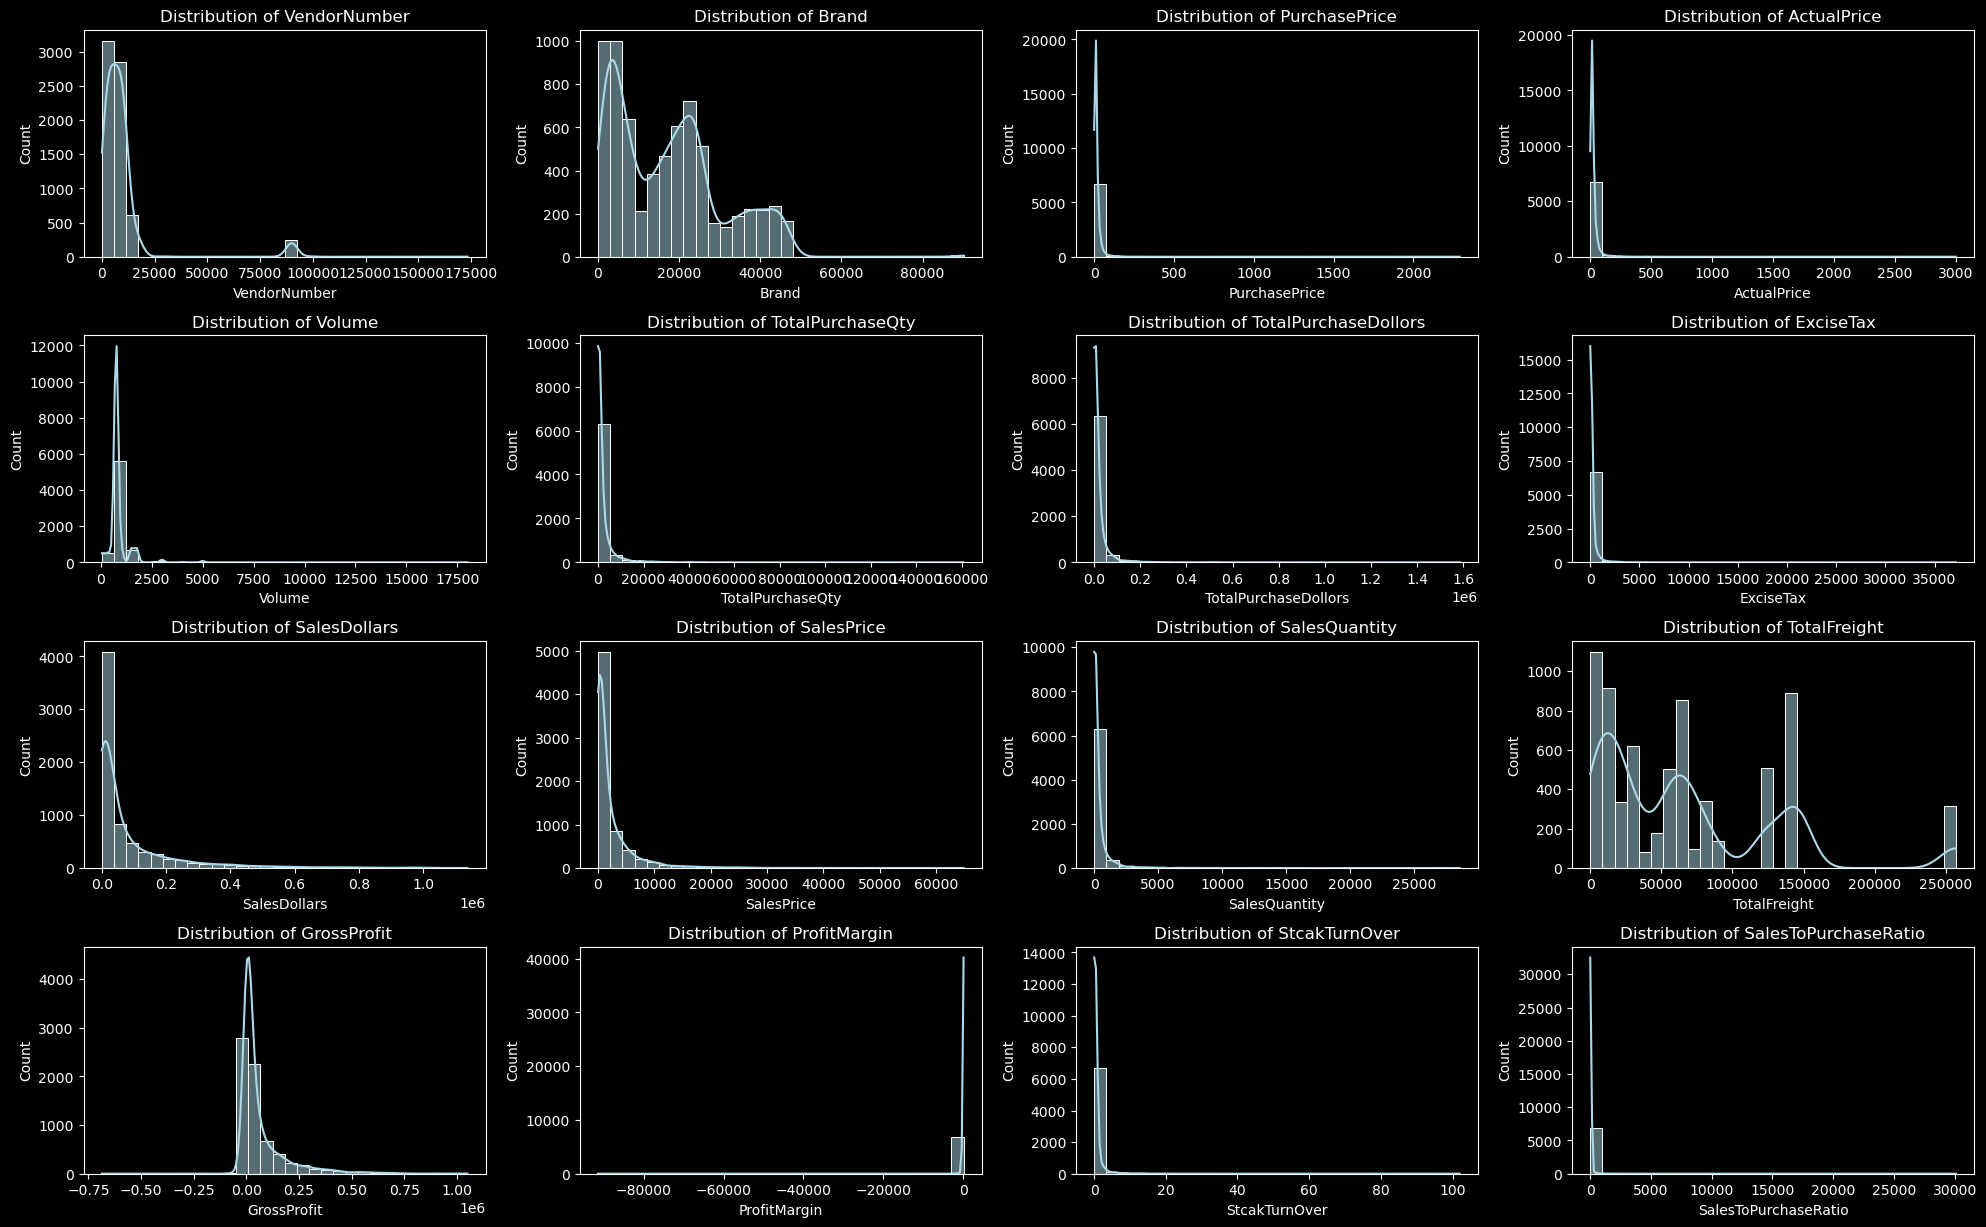

In [52]:
# Distribution Plots for Numerical Columns

num_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(20, 15))
for i, col in enumerate(num_cols):
    plt.subplot(5, 4, i + 1)
    plt.style.use('dark_background')
    sns.histplot(df[col], kde=True, bins=30, color='lightblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

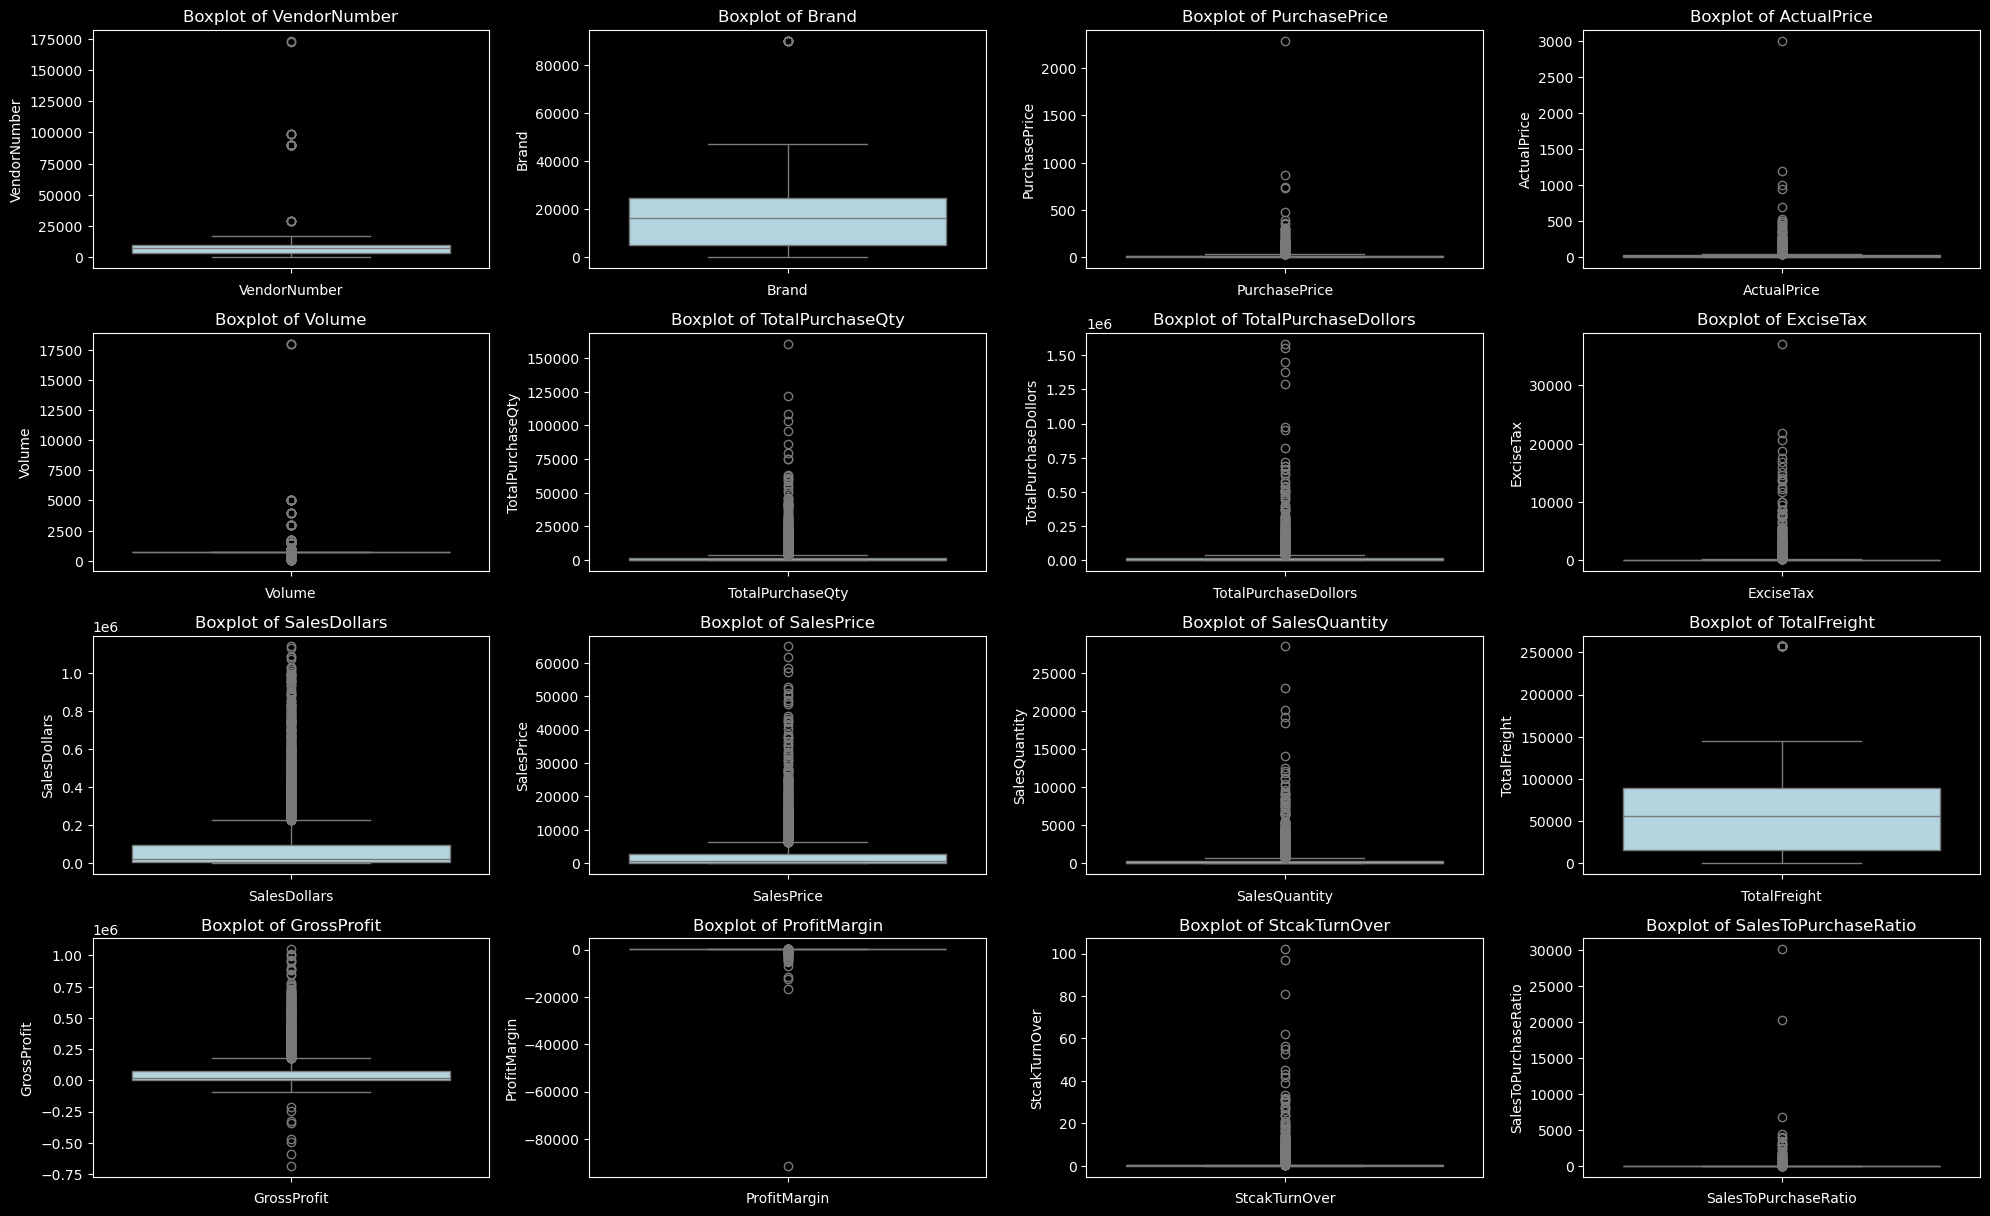

In [5]:
# Outlier Detection with boxplots
plt.figure(figsize=(20, 15))
for i, col in enumerate(num_cols):
    plt.subplot(5, 4, i + 1)
    plt.style.use('dark_background')
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

### Summary Statistics Insights

##### **Negative & Zero Values**

- Gross Profit: The minimum value of -685,658.66 indicates that some transactions resulted in substantial losses, possibly due to selling below cost or high cost of goods sold.
- Profit Margin: If referring to net profit, the minimum of -91,421.15 suggests significant losses on some products. If it's a percentage, a negative value would imply that costs exceeded revenues.
- Sales Quantity & Sales Dollars: Minimum values of 1 and 101 mean every product sold at least once. However, those with very low sales may be slow-moving or nearing obsolescence.

##### **Outliers Indicated by High Standard Deviations:**

- Purchase & Actual Prices: The max values (2,290.07 & 2,999.99) are significantly higher than the mean (17.17 & 25.54), indicating potential premium products.
- Freight Cost: The wide range in freight costs (0.27 to 257,032.07) indicates variability in shipment size, logistics strategies, or possible inefficiencies.
- Stock Turnover: Ranges from 0 to 102, implying some products sell extremely fast while others remain in stock indefinitely. Value more than 1 indicates that Sold quantity for that product is higher than purchased quantity due to either sales are being fulfilled from older stock.

In [6]:
# Let's filter the data by removing inconsistents

Vendor_Summary = pd.read_sql_query(
    """select * from Vendor_Sales_Summary
    where GrossProfit > 0
    and ProfitMargin > 0
    and SalesQuantity > 0""",
    conn
)
Vendor_Summary.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,6367.0,9659.474321,16394.560383,2.000000,3252.000000,7153.000000,9552.000000,1.733570e+05
Brand,6367.0,17245.299513,13271.214223,58.000000,5092.000000,16329.000000,24554.500000,9.008900e+04
PurchasePrice,6367.0,14.312213,16.573787,0.380000,6.620000,9.670000,16.050000,3.515500e+02
ActualPrice,6367.0,21.530784,24.180118,0.490000,9.990000,14.990000,23.990000,4.999900e+02
Volume,6367.0,859.910005,548.881791,50.000000,750.000000,750.000000,750.000000,1.800000e+04
TotalPurchaseQty,6367.0,2025.244228,5804.547344,1.000000,48.000000,378.000000,1671.500000,1.607350e+05
TotalPurchaseDollors,6367.0,17396.749343,46109.973825,0.710000,537.745000,3883.950000,15640.370000,9.523832e+05
ExciseTax,6367.0,194.304647,842.923750,0.020000,2.860000,15.740000,83.315000,1.875786e+04
SalesDollars,6367.0,88513.708026,148062.586032,101.000000,4885.000000,26520.000000,102456.500000,1.138033e+06
SalesPrice,6367.0,2378.908002,4409.214616,0.980000,174.880000,773.190000,2725.005000,6.167062e+04


In [7]:
Vendor_Summary

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQty,TotalPurchaseDollors,ExciseTax,SalesDollars,SalesPrice,SalesQuantity,TotalFreight,GrossProfit,ProfitMargin,StcakTurnOver,SalesToPurchaseRatio
0,2,"IRA GOLDMAN AND WILLIAMS, LLP",90085,Ch Lilian 09 Ladouys St Este,23.86,36.99,750.0,7,167.02,0.22,213,36.99,2,27.08,45.98,21.586854,0.285714,1.275296
1,105,ALTAMAR BRANDS LLC,8412,Tequila Ocho Plata Fresno,35.71,49.99,750.0,140,4999.40,11.84,7935,699.86,15,62.39,2935.60,36.995589,0.107143,1.587190
2,287,APPOLO VINEYARDS LLC,24921,Appolo Vyds Seyval,10.40,15.49,750.0,36,374.40,0.33,1191,46.47,3,12.28,816.60,68.564232,0.083333,3.181090
3,287,APPOLO VINEYARDS LLC,24922,Appolo Vyds China Girl,10.47,15.49,750.0,36,376.92,0.55,2655,77.45,5,12.28,2278.08,85.803390,0.138889,7.043935
4,388,ATLANTIC IMPORTING COMPANY,2034,Glendalough Double Barrel,21.32,32.99,750.0,828,17652.96,117.56,73937,3652.74,149,211.74,56284.04,76.124322,0.179952,4.188363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362,98450,Serralles Usa LLC,5953,Barrow's Intense Ginger,15.87,19.99,375.0,46,730.02,9.37,10860,439.78,24,856.02,10129.98,93.277901,0.521739,14.876305
6363,98450,Serralles Usa LLC,6877,Original Wondermint Schnapps,13.56,18.99,750.0,8,108.48,7.11,4572,170.91,9,856.02,4463.52,97.627297,1.125000,42.146018
6364,98450,Serralles Usa LLC,7890,Barrow's Intense Ginger,22.21,29.99,750.0,43,955.03,22.06,10655,599.80,28,856.02,9699.97,91.036790,0.651163,11.156718
6365,98450,Serralles Usa LLC,8543,Kringle Cream,14.81,19.99,750.0,170,2517.70,57.54,27110,1007.49,73,856.02,24592.30,90.713021,0.429412,10.767764


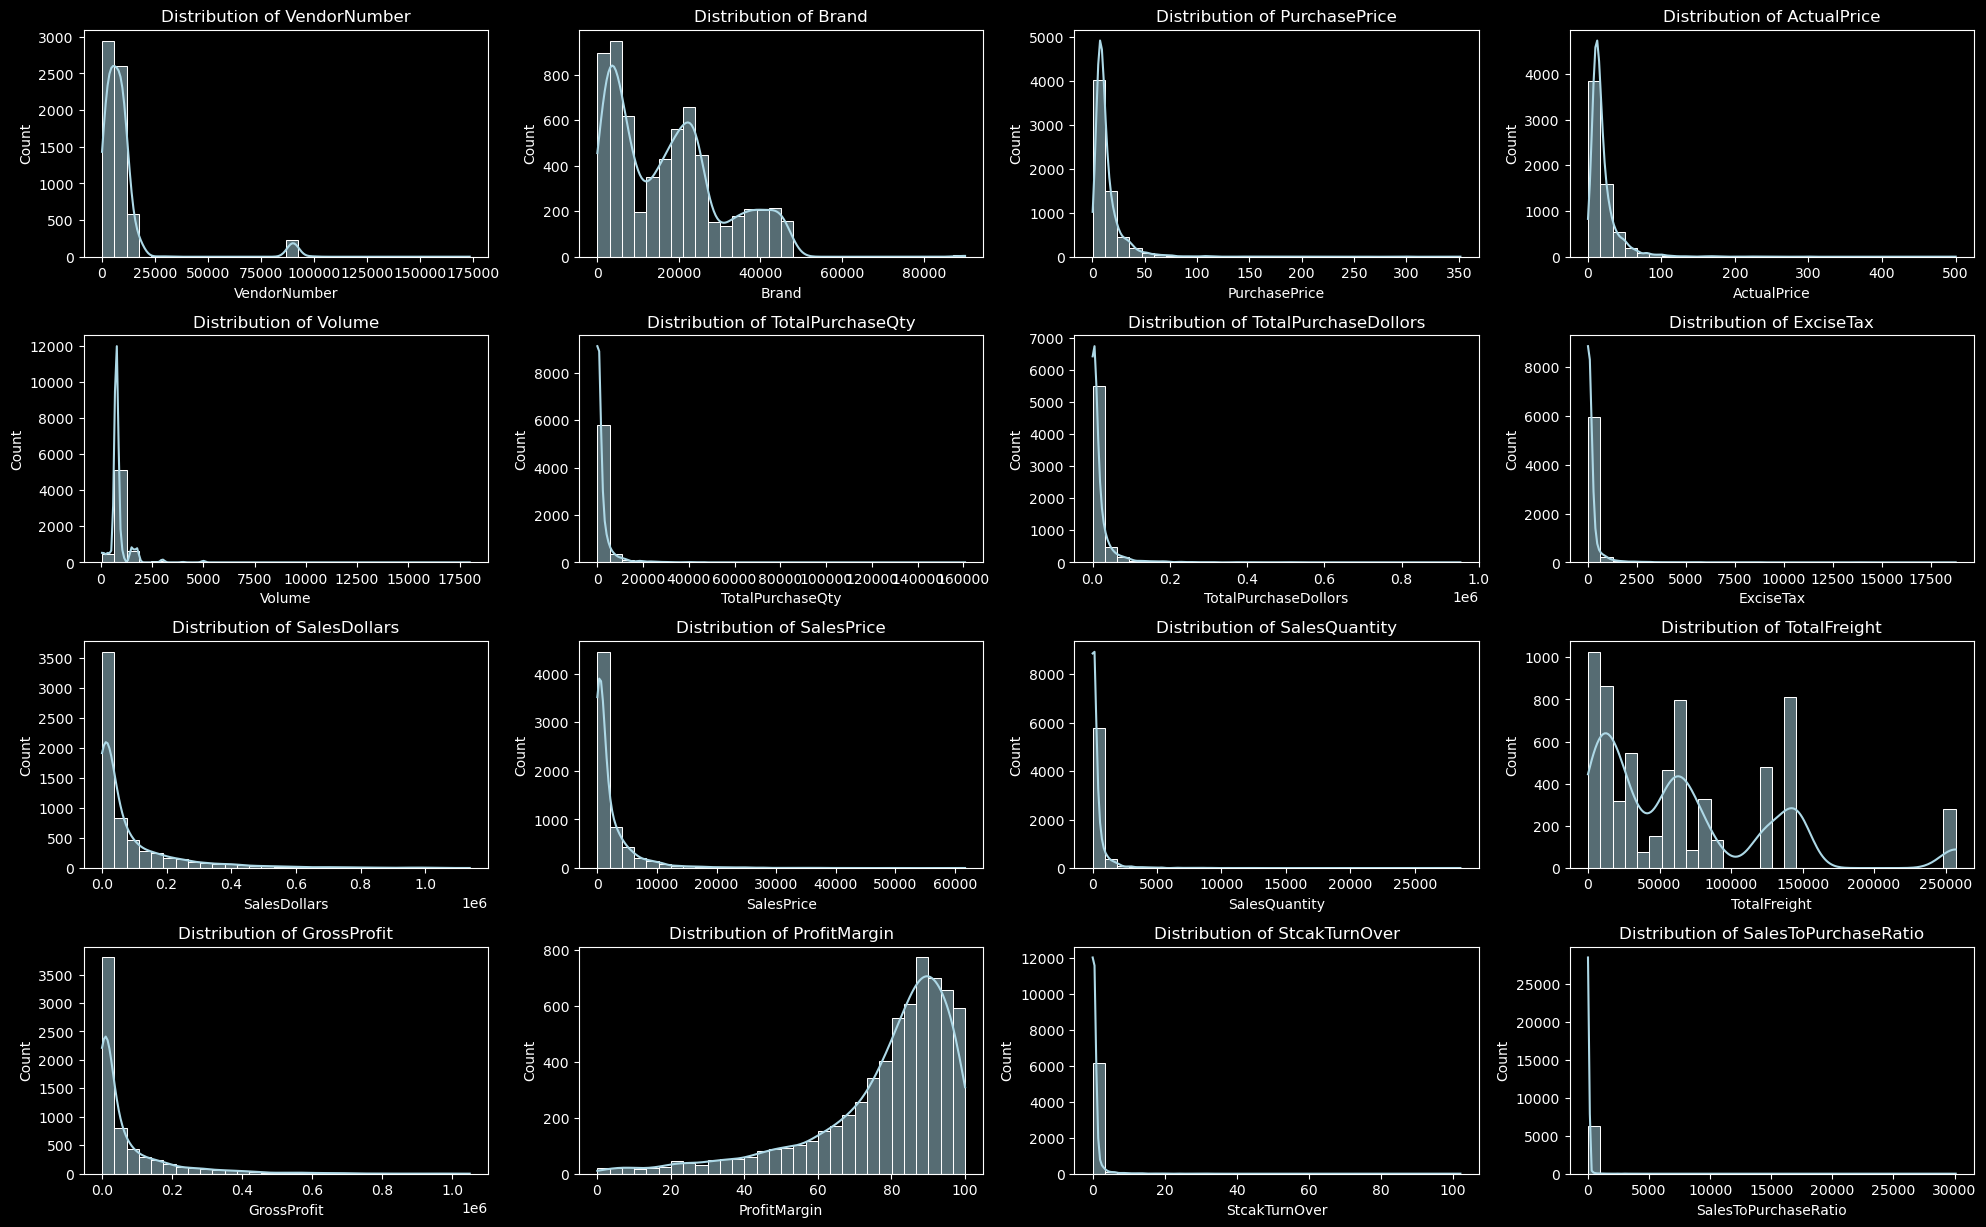

In [8]:
# Distribution Plots for Numerical Columns (updated for Vendor_Summary)

numerical_cols = Vendor_Summary.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols):
    plt.subplot(5, 4, i + 1)
    plt.style.use('dark_background')
    sns.histplot(Vendor_Summary[col], kde=True, bins=30, color='lightblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

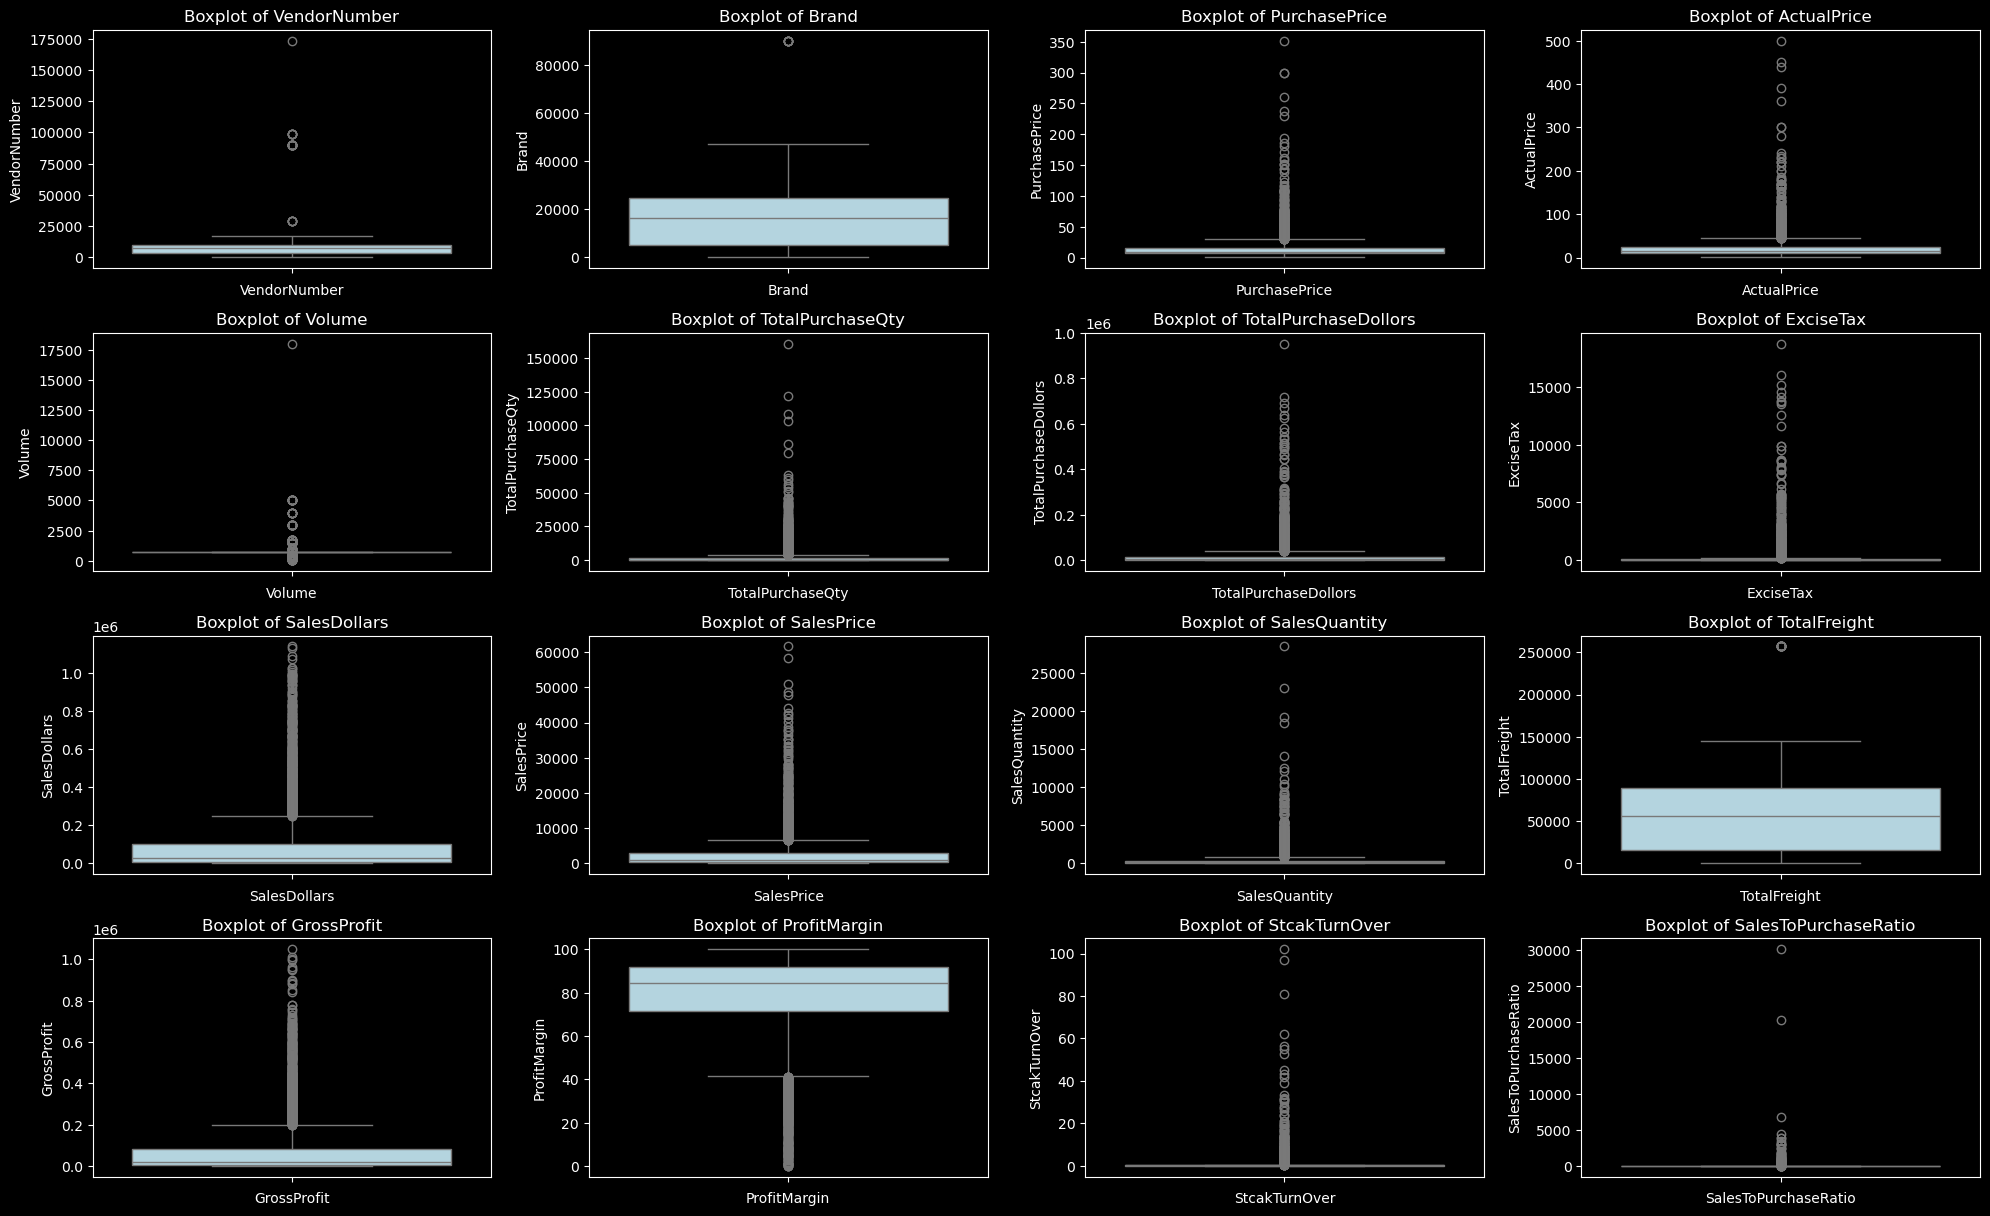

In [9]:
# Outlier Detection with boxplots (updated for Vendor_Summary)

plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols):
    plt.subplot(5, 4, i + 1)
    plt.style.use('dark_background')
    sns.boxplot(y=Vendor_Summary[col], color='lightblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

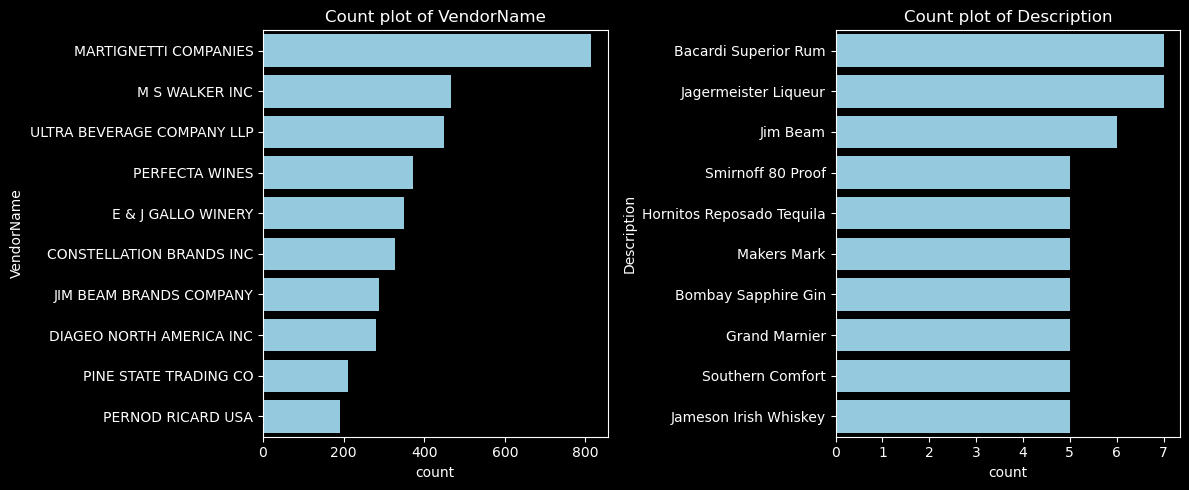

In [10]:
# Count Plots for Categorical Columns

Categorical_cols = ["VendorName", "Description"]

fig = plt.figure(figsize=(12, 5))
# fig.patch.set_facecolor('#222222')
plt.style.use('dark_background')
for i, col in enumerate(Categorical_cols):
    plt.subplot(1, 2, i + 1)
    sns.countplot(y=Vendor_Summary[col], order=Vendor_Summary[col].value_counts().index[:10], color='skyblue') #Top 10 vendors
    plt.title(f'Count plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

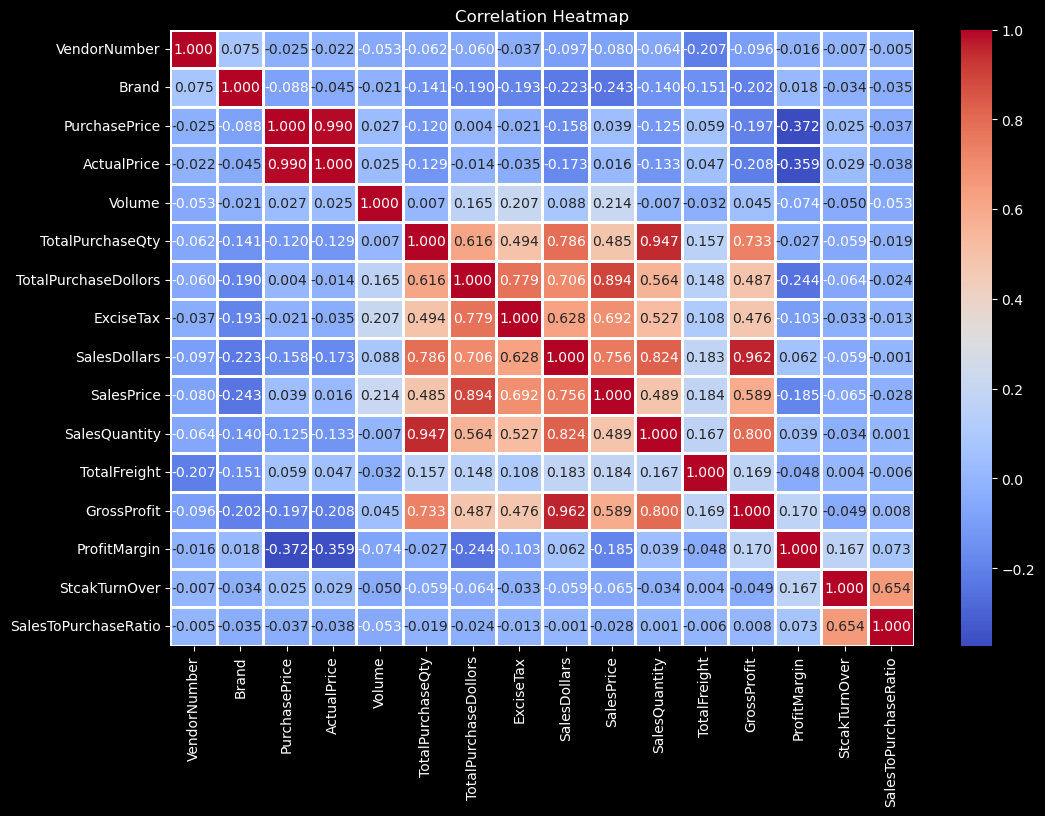

In [11]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = Vendor_Summary[numerical_cols].corr()
plt.style.use('dark_background')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=1)
plt.title('Correlation Heatmap')

##### **Correlation Heatmap**

- PurchasePrice has weak correlations with SalesDollars **(-0.158)** and GrossProfit **(-0.197)**, suggesting that price variations do not significantly impact sales revenue or profit.
- Strong correlation between total purchase quantity and total sales quantity **(0.947)**, confirming efficient inventory turnover.
- Negative correlation between profit margin & total sales price **(0.039)** suggests that as sales price increases, margins decrease, possibly due to competitive pricing pressures.
- StockTurnover has weak negative correlations with both GrossProfit **(-0.038)** and ProfitMargin **(-0.055)**, indicating that faster turnover does not necessarily result in higher profitability.

## Data Analysis

#### **Business Requirments**
##### **1.** *Identify Brands that needs Promotiorlal or Pricing Adjustments which exhibit lower sales performance but higher profit margins.*

In [12]:
brand_performance = Vendor_Summary.groupby('Description').agg({
    'SalesDollars': 'sum',
    'ProfitMargin': 'mean'
}).reset_index()

brand_performance

,Description,SalesDollars,ProfitMargin
0,(RI) 1,17598,44.471190
1,10 Span Cab Svgn CC,1808,44.035398
2,10 Span Chard CC,3439,62.408840
3,10 Span Pnt Nr CC,4105,81.004629
4,12 Days of Pearls Gift Set,13029,99.944815
...,...,...,...
5691,Zorvino Vyds Peachez,30699,82.446725
5692,Zorvino Vyds Pearz,48066,86.855574
5693,Zorvino Vyds Sangiovese,14527,77.584911
5694,Zum Rsl,36733,91.135491


In [13]:
low_sales_threshold = brand_performance['SalesDollars'].quantile(0.10)
high_profit_threshold = brand_performance['ProfitMargin'].quantile(0.80)

In [14]:
low_sales_threshold

1191.5

In [15]:
high_profit_threshold

92.81999346618753

In [16]:
# Filter brands with low sales but high profit margin

target_brands = brand_performance[
    (brand_performance['SalesDollars'] <= low_sales_threshold) &
    (brand_performance['ProfitMargin'] >= high_profit_threshold)
]

print("Brands with low sales but high profit margin")
display(target_brands.sort_values(by='SalesDollars', ascending=True))

Brands with low sales but high profit margin


,Description,SalesDollars,ProfitMargin
536,Beyond Svgn Bl,236,98.042373
4518,Salers Apertif Gentiane,249,94.265060
1236,Ch Musar Hochar Red,315,93.523810
3847,Occhio A Vento Vermentino,316,95.854430
4287,Ravines Gewurztraminer,330,96.678788
...,...,...,...
5637,Yellow Tail Moscato Bubbles,1165,97.813734
1122,Celtic Honey Liqueur,1166,93.117496
1032,Casa Liliana Good Merlot,1173,97.786871
1572,Courvoisier Rose,1175,97.702128


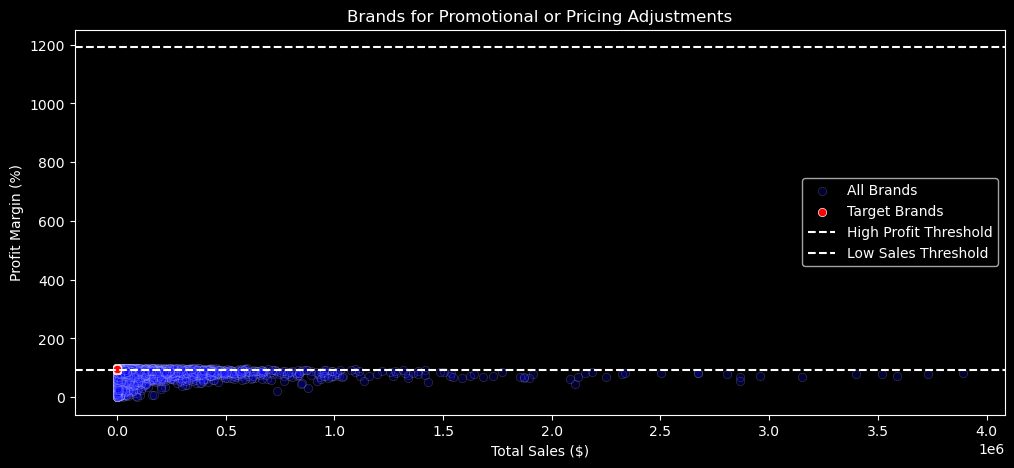

In [17]:
# Scatter Plot for Low Sales vs High Profit Margin
plt.figure(figsize=(12, 5))
plt.style.use('dark_background')
sns.scatterplot(data = brand_performance, x = 'SalesDollars', y = 'ProfitMargin', color = 'blue', label = 'All Brands', alpha=0.2)
sns.scatterplot(data = target_brands, x = 'SalesDollars', y = 'ProfitMargin', color = 'red', label = 'Target Brands')

plt.axhline(y=high_profit_threshold, color='white', linestyle='--', label='High Profit Threshold')
plt.axhline(y=low_sales_threshold, color='white', linestyle='--', label='Low Sales Threshold')

plt.xlabel('Total Sales ($)')
plt.ylabel('Profit Margin (%)')
plt.title('Brands for Promotional or Pricing Adjustments')
plt.legend()
plt.show()

#### **2.** *Which vendors and brands are demonstrate the highest sales performance?*

In [18]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"${value/1_000_000:.2f}M"
    elif value >= 1_000:
        return f"${value/1_000:.2f}K"
    else:
        return f"${value:.2f}"

In [19]:
top_vendors = Vendor_Summary.groupby('VendorName')["SalesDollars"].sum().nlargest(10)
top_brands = Vendor_Summary.groupby('Description')["SalesDollars"].sum().nlargest(10)
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      64122073
JIM BEAM BRANDS COMPANY       51739487
MARTIGNETTI COMPANIES         40540301
CONSTELLATION BRANDS INC      38930210
E & J GALLO WINERY            35780389
M S WALKER INC                26670461
PERNOD RICARD USA             25371824
BACARDI USA INC               24704382
ULTRA BEVERAGE COMPANY LLP    21396952
SAZERAC CO INC                20272525
Name: SalesDollars, dtype: int64

In [20]:
top_brands

Description
Smirnoff 80 Proof          3889364
Jagermeister Liqueur       3731803
Kahlua                     3587318
Jim Beam                   3521243
Bacardi Superior Rum       3397434
Baileys Irish Cream        3149859
Jose Cuervo Especial       2957438
Jameson Irish Whiskey      2866885
Jack Daniels No 7 Black    2865384
Capt Morgan Spiced Rum     2805825
Name: SalesDollars, dtype: int64

In [21]:
top_vendors.apply(lambda x: format_dollars(x))

VendorName
DIAGEO NORTH AMERICA INC      $64.12M
JIM BEAM BRANDS COMPANY       $51.74M
MARTIGNETTI COMPANIES         $40.54M
CONSTELLATION BRANDS INC      $38.93M
E & J GALLO WINERY            $35.78M
M S WALKER INC                $26.67M
PERNOD RICARD USA             $25.37M
BACARDI USA INC               $24.70M
ULTRA BEVERAGE COMPANY LLP    $21.40M
SAZERAC CO INC                $20.27M
Name: SalesDollars, dtype: object

In [22]:
top_brands.apply(lambda x: format_dollars(x))

Description
Smirnoff 80 Proof          $3.89M
Jagermeister Liqueur       $3.73M
Kahlua                     $3.59M
Jim Beam                   $3.52M
Bacardi Superior Rum       $3.40M
Baileys Irish Cream        $3.15M
Jose Cuervo Especial       $2.96M
Jameson Irish Whiskey      $2.87M
Jack Daniels No 7 Black    $2.87M
Capt Morgan Spiced Rum     $2.81M
Name: SalesDollars, dtype: object

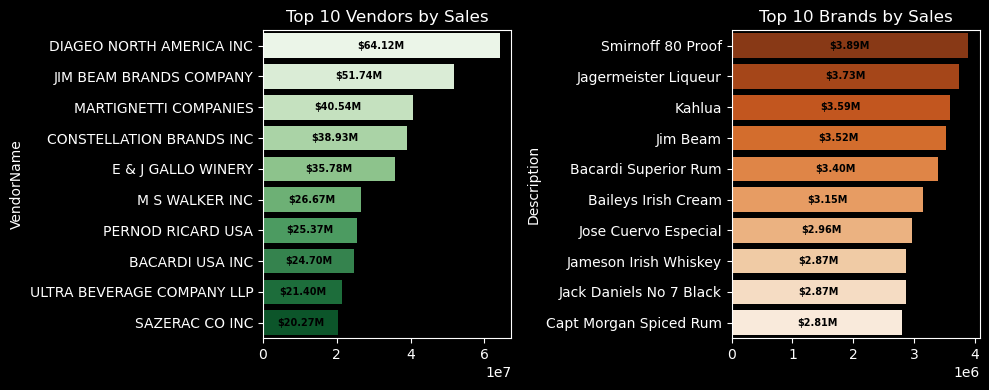

In [23]:
# Bar plot for top vendors and brands

plt.figure(figsize=(10, 4))
plt.style.use('dark_background')

# Top Vendors
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y = top_vendors.index, x = top_vendors.values, palette='Greens')
plt.title('Top 10 Vendors by Sales')

for bar in ax1.patches:
    ax1.text(
        bar.get_width() / 2,
        bar.get_y() + bar.get_height() / 2,
        format_dollars(bar.get_width()),
        va='center', ha='center', fontsize=7, color='Black', weight='bold'
    )

# Top Brands
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y = top_brands.index, x = top_brands.values, palette='Oranges_r')
plt.title('Top 10 Brands by Sales')

for bar in ax2.patches:
    ax2.text(
        bar.get_width() / 2,
        bar.get_y() + bar.get_height() / 2,
        format_dollars(bar.get_width()),
        va='center', ha='center', fontsize=7, color='Black', weight='bold'
    )

plt.tight_layout()
plt.show()

In [24]:
Vendor_Summary.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'ActualPrice', 'Volume', 'TotalPurchaseQty', 'TotalPurchaseDollors',
       'ExciseTax', 'SalesDollars', 'SalesPrice', 'SalesQuantity',
       'TotalFreight', 'GrossProfit', 'ProfitMargin', 'StcakTurnOver',
       'SalesToPurchaseRatio'],
      dtype='object')

#### **3.** *Which vendors contribute the most to total purchase dollors*

In [25]:
Vendor_Performance = Vendor_Summary.groupby('VendorName').agg({
    'SalesDollars': 'sum',
    'TotalPurchaseDollors': 'sum',
    'GrossProfit': 'sum'
    
}).reset_index()

In [26]:
Vendor_Performance['PurchaseContribution%'] = Vendor_Performance['TotalPurchaseDollors'] / Vendor_Performance['TotalPurchaseDollors'].sum() * 100
Vendor_Performance = round(Vendor_Performance.sort_values('PurchaseContribution%', ascending=False), 2)

In [27]:
# Display top 10 vendors

top_vendors = Vendor_Performance.head(10)
top_vendors['SalesDollars'] = top_vendors['SalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollors'] = top_vendors['TotalPurchaseDollors'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors

,VendorName,SalesDollars,TotalPurchaseDollors,GrossProfit,PurchaseContribution%
23,DIAGEO NORTH AMERICA INC,$64.12M,$13.76M,$50.36M,12.42
42,JIM BEAM BRANDS COMPANY,$51.74M,$10.12M,$41.62M,9.13
64,PERNOD RICARD USA,$25.37M,$7.82M,$17.55M,7.06
53,MARTIGNETTI COMPANIES,$40.54M,$7.80M,$32.74M,7.04
5,BACARDI USA INC,$24.70M,$6.71M,$17.99M,6.06
18,CONSTELLATION BRANDS INC,$38.93M,$6.59M,$32.34M,5.95
28,E & J GALLO WINERY,$35.78M,$5.18M,$30.60M,4.68
9,BROWN-FORMAN CORP,$16.00M,$4.07M,$11.93M,3.67
75,SAZERAC CO INC,$20.27M,$3.93M,$16.35M,3.54
49,M S WALKER INC,$26.67M,$3.89M,$22.78M,3.51


In [28]:
# Cummulative contribution of top vendors
top_vendors['CumulativeContribution%'] = top_vendors['PurchaseContribution%'].cumsum()
top_vendors

,VendorName,SalesDollars,TotalPurchaseDollors,GrossProfit,PurchaseContribution%,CumulativeContribution%
23,DIAGEO NORTH AMERICA INC,$64.12M,$13.76M,$50.36M,12.42,12.42
42,JIM BEAM BRANDS COMPANY,$51.74M,$10.12M,$41.62M,9.13,21.55
64,PERNOD RICARD USA,$25.37M,$7.82M,$17.55M,7.06,28.61
53,MARTIGNETTI COMPANIES,$40.54M,$7.80M,$32.74M,7.04,35.65
5,BACARDI USA INC,$24.70M,$6.71M,$17.99M,6.06,41.71
18,CONSTELLATION BRANDS INC,$38.93M,$6.59M,$32.34M,5.95,47.66
28,E & J GALLO WINERY,$35.78M,$5.18M,$30.60M,4.68,52.34
9,BROWN-FORMAN CORP,$16.00M,$4.07M,$11.93M,3.67,56.01
75,SAZERAC CO INC,$20.27M,$3.93M,$16.35M,3.54,59.55
49,M S WALKER INC,$26.67M,$3.89M,$22.78M,3.51,63.06


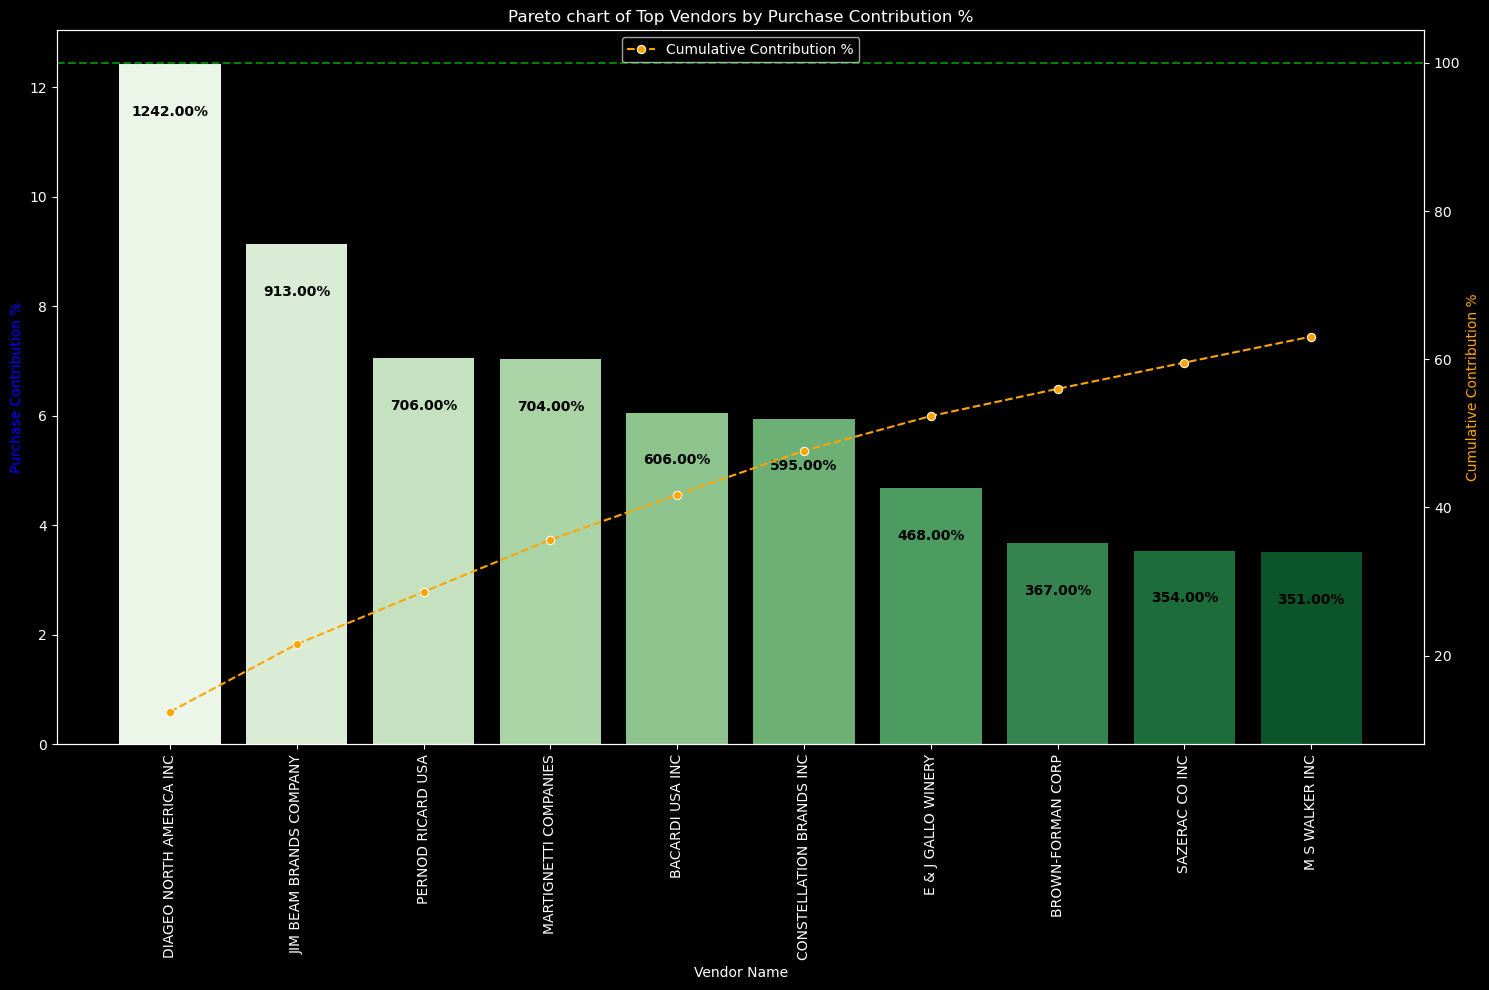

In [29]:
# Bar plot for top vendors with cumulative contribution

fig, ax1 = plt.subplots(figsize=(15, 10))
plt.style.use('dark_background')

# Bar plot for purchase contribution
sns.barplot(x = top_vendors['VendorName'], y = top_vendors['PurchaseContribution%'], palette='Greens', ax=ax1)

for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(
        i, value - 1, f"{value:.2%}", 
        ha='center', va='bottom', fontsize=10, color='Black', weight='bold'
    )

# Line plot for cumulative contribution
ax2 = ax1.twinx()
sns.lineplot(x = top_vendors['VendorName'], y = top_vendors['CumulativeContribution%'], color='orange', marker='o', linestyle = 'dashed', label='Cumulative Contribution %')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='orange')
ax1.set_xlabel('Vendor Name')
ax1.set_title('Pareto chart of Top Vendors by Purchase Contribution %')

ax2.axhline(y=100, color='green', linestyle='dashed', alpha = 1)
ax2.legend(loc='upper center')

plt.tight_layout()
plt.show()

#### **4.** *How much of total procurement is dependent on the top vendors?*

In [30]:
print(f"Total Purchase Contributions by Top 10 Vendors is : {round(top_vendors['PurchaseContribution%'].sum(), 2)}%")

Total Purchase Contributions by Top 10 Vendors is : 63.06%


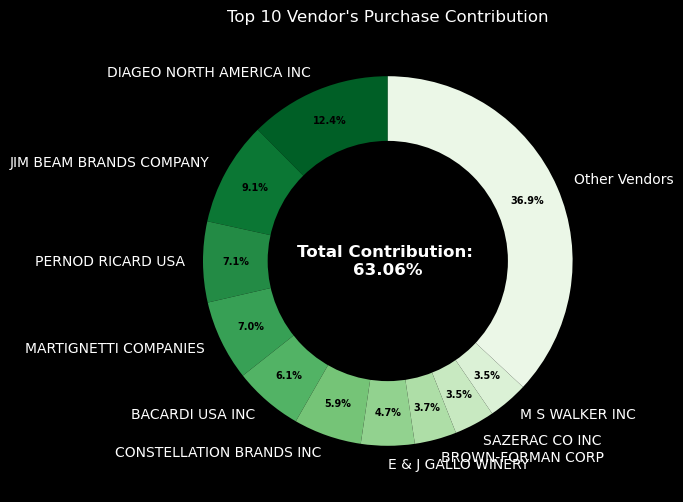

In [31]:
# Donut chart for top vendors' purchase contribution

vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['PurchaseContribution%'].values)
total_purchase_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_purchase_contribution

# Append 'Other Vendors' for remaining contribution
vendors.append('Other Vendors')
purchase_contributions.append(remaining_contribution)

# Donut chart
fig, ax = plt.subplots(figsize=(6, 6))
plt.style.use('dark_background')
wedges, texts, autotexts = ax.pie(
    purchase_contributions,
    labels=vendors,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("Greens_r", len(vendors)),
    pctdistance=0.82
)

# Change color of pie value (percentage text)
for autotext in autotexts:
    autotext.set_color('black')  # Change to any color you want, e.g., 'white', 'red'
    autotext.set_fontweight('bold')  # Optional: make it bold
    autotext.set_fontsize(7)  # Optional: set font size

# Draw a circle at the center of the pie to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.65, fc='black')
fig.gca().add_artist(centre_circle)

# Add total contribution annotation in the center
plt.text(
    0, 0, f'Total Contribution: \n{total_purchase_contribution:.2f}%',
    fontsize=12, ha='center', va='center', color='white', weight='bold'
)

plt.title("Top 10 Vendor's Purchase Contribution")
# plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### **5.** *Does purchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost savings?*

In [32]:

Vendor_Summary.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'ActualPrice', 'Volume', 'TotalPurchaseQty', 'TotalPurchaseDollors',
       'ExciseTax', 'SalesDollars', 'SalesPrice', 'SalesQuantity',
       'TotalFreight', 'GrossProfit', 'ProfitMargin', 'StcakTurnOver',
       'SalesToPurchaseRatio'],
      dtype='object')

In [33]:
Vendor_Summary['UnitPurchasePrice'] = Vendor_Summary['TotalPurchaseDollors'] / Vendor_Summary['TotalPurchaseQty']

In [34]:
Vendor_Summary

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQty,TotalPurchaseDollors,ExciseTax,SalesDollars,SalesPrice,SalesQuantity,TotalFreight,GrossProfit,ProfitMargin,StcakTurnOver,SalesToPurchaseRatio,UnitPurchasePrice
0,2,"IRA GOLDMAN AND WILLIAMS, LLP",90085,Ch Lilian 09 Ladouys St Este,23.86,36.99,750.0,7,167.02,0.22,213,36.99,2,27.08,45.98,21.586854,0.285714,1.275296,23.86
1,105,ALTAMAR BRANDS LLC,8412,Tequila Ocho Plata Fresno,35.71,49.99,750.0,140,4999.40,11.84,7935,699.86,15,62.39,2935.60,36.995589,0.107143,1.587190,35.71
2,287,APPOLO VINEYARDS LLC,24921,Appolo Vyds Seyval,10.40,15.49,750.0,36,374.40,0.33,1191,46.47,3,12.28,816.60,68.564232,0.083333,3.181090,10.40
3,287,APPOLO VINEYARDS LLC,24922,Appolo Vyds China Girl,10.47,15.49,750.0,36,376.92,0.55,2655,77.45,5,12.28,2278.08,85.803390,0.138889,7.043935,10.47
4,388,ATLANTIC IMPORTING COMPANY,2034,Glendalough Double Barrel,21.32,32.99,750.0,828,17652.96,117.56,73937,3652.74,149,211.74,56284.04,76.124322,0.179952,4.188363,21.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362,98450,Serralles Usa LLC,5953,Barrow's Intense Ginger,15.87,19.99,375.0,46,730.02,9.37,10860,439.78,24,856.02,10129.98,93.277901,0.521739,14.876305,15.87
6363,98450,Serralles Usa LLC,6877,Original Wondermint Schnapps,13.56,18.99,750.0,8,108.48,7.11,4572,170.91,9,856.02,4463.52,97.627297,1.125000,42.146018,13.56
6364,98450,Serralles Usa LLC,7890,Barrow's Intense Ginger,22.21,29.99,750.0,43,955.03,22.06,10655,599.80,28,856.02,9699.97,91.036790,0.651163,11.156718,22.21
6365,98450,Serralles Usa LLC,8543,Kringle Cream,14.81,19.99,750.0,170,2517.70,57.54,27110,1007.49,73,856.02,24592.30,90.713021,0.429412,10.767764,14.81


In [35]:
Vendor_Summary['OrderSize'] = pd.qcut(Vendor_Summary['TotalPurchaseQty'], 
    q=3,
    labels=['Small', 'Medium', 'Large'])

In [36]:
Vendor_Summary[['OrderSize', 'TotalPurchaseQty']].sort_values(by='TotalPurchaseQty', ascending=False)

,OrderSize,TotalPurchaseQty
1973,Large,160735
1770,Large,122070
1861,Large,108744
3554,Large,102987
5145,Large,85997
...,...,...
4597,Small,1
2442,Small,1
2474,Small,1
4611,Small,1


In [37]:
Vendor_Summary.groupby('OrderSize')[['UnitPurchasePrice']].mean().reset_index()

,OrderSize,UnitPurchasePrice
0,Small,19.695205
1,Medium,13.361015
2,Large,9.873556


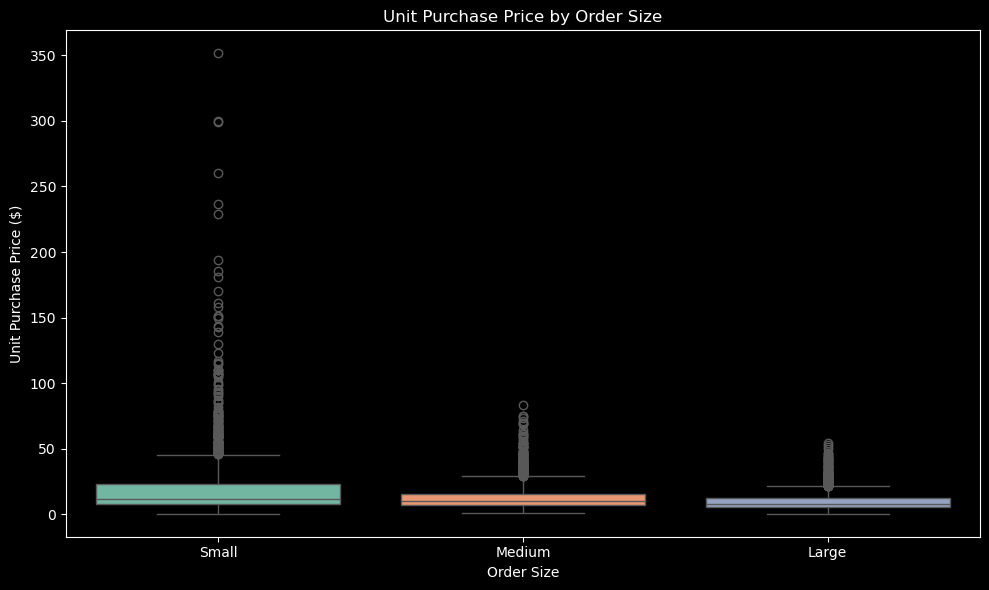

In [38]:
# Boxplot for Unit Purchase Price by Order Size
plt.figure(figsize=(10, 6))
plt.style.use('dark_background')
sns.boxplot(x='OrderSize', y='UnitPurchasePrice', data=Vendor_Summary, palette='Set2')
plt.title('Unit Purchase Price by Order Size')
plt.xlabel('Order Size')
plt.ylabel('Unit Purchase Price ($)')
plt.tight_layout()
plt.show()

- Vendors buying in bulk (Large Order Size) get the lowest unit price **($9,87 per unit)**, meaning higher margins if they can manage inventory efficiently.
- The price difference between Small and Large orders is substantial **(~69% reduction in unit cost)**
- This suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite lower per-unit revenue.

#### **6.** *Which vendors have low inventory turnover, indicating excess stock and slow-moving products?*

In [50]:
Vendor_Summary.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'ActualPrice', 'Volume', 'TotalPurchaseQty', 'TotalPurchaseDollors',
       'ExciseTax', 'SalesDollars', 'SalesPrice', 'SalesQuantity',
       'TotalFreight', 'GrossProfit', 'ProfitMargin', 'StcakTurnOver',
       'SalesToPurchaseRatio', 'UnitPurchasePrice', 'OrderSize',
       'UnsoldedInventory'],
      dtype='object')

In [51]:
Vendor_Summary[Vendor_Summary['StcakTurnOver']<1].groupby('VendorName')[['StcakTurnOver']].mean().reset_index().sort_values(by='StcakTurnOver', ascending=True).head(10).round(2)

,VendorName,StcakTurnOver
50,MANGO BOTTLING INC,0.03
60,PARK STREET IMPORTS LLC,0.06
92,TAMWORTH DISTILLING,0.08
15,CENTEUR IMPORTS LLC,0.09
10,BULLY BOY DISTILLERS,0.09
88,SWEET BABY VINEYARD,0.10
1,ALTAMAR BRANDS LLC,0.11
109,ZORVINO VINEYARDS,0.11
3,APPOLO VINEYARDS LLC,0.11
51,MARSALLE COMPANY,0.11


#### **7.** *How much capital is locked in unsold inventory per vendor, and which vendors are contribute the most to it?*

In [41]:
Vendor_Summary['UnsoldedInventory'] = Vendor_Summary['TotalPurchaseQty'] - Vendor_Summary['SalesQuantity'] * Vendor_Summary['PurchasePrice']
print("Capital locked in unsold inventory per vendor:", format_dollars(Vendor_Summary['UnsoldedInventory'].sum()))

Capital locked in unsold inventory per vendor: $-6994003.24


In [42]:
# Aggrigate unsold inventory by vendor
inventory_value_per_vendor = Vendor_Summary.groupby('VendorName')['UnsoldedInventory'].sum().reset_index()

inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by='UnsoldedInventory', ascending=False)
inventory_value_per_vendor['UnsoldedInventory'] = inventory_value_per_vendor['UnsoldedInventory'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldedInventory
50,MAJESTIC FINE WINES,$40.23K
97,TREASURY WINE ESTATES,$39.78K
47,LATITUDE BEVERAGE COMPANY,$3.82K
51,MANGO BOTTLING INC,$1.94K
90,SWEET BABY VINEYARD,$1.06K
92,TAKARA SAKE USA INC,$787.80
78,SEA HAGG DISTILLERY LLC,$407.17
111,ZORVINO VINEYARDS,$159.79
16,CENTEUR IMPORTS LLC,$61.30
62,PARK STREET IMPORTS LLC,$12.29


#### **8.** *What is the 95% confidence intervals for profit margins of top-performing and low-performing vendors.*

In [43]:
top_threshold = Vendor_Summary['SalesDollars'].quantile(0.75)
low_threshold = Vendor_Summary['SalesDollars'].quantile(0.25)

In [44]:
top_vendors = Vendor_Summary[Vendor_Summary['SalesDollars']>= top_threshold]['ProfitMargin'].dropna().round(2)
low_vendors = Vendor_Summary[Vendor_Summary['SalesDollars']<= low_threshold]['ProfitMargin'].dropna().round(2)

In [45]:
top_vendors.sort_values(ascending=False)

3005    100.00
3178     99.97
102      99.97
3006     99.96
512      99.95
         ...  
1625      6.80
7         5.26
1993      4.18
6056      2.73
64        0.86
Name: ProfitMargin, Length: 1592, dtype: float64

In [46]:
low_vendors.sort_values(ascending=True)

6327     0.09
713      0.11
6227     0.23
3344     0.32
1056     0.89
        ...  
5460    99.82
1992    99.83
4969    99.83
3863    99.87
6254    99.93
Name: ProfitMargin, Length: 1592, dtype: float64

In [47]:
# Find 95% confidence intervals for profit margins of top-performing and low-performing vendors

def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data)) # Calculate standard error
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)  # t critical value for two-tailed test
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

Top Vendors 95% Confidence Interval: (80.76, 82.25), Mean: 81.50
Low Vendors 95% Confidence Interval: (71.91, 74.25), Mean: 73.08


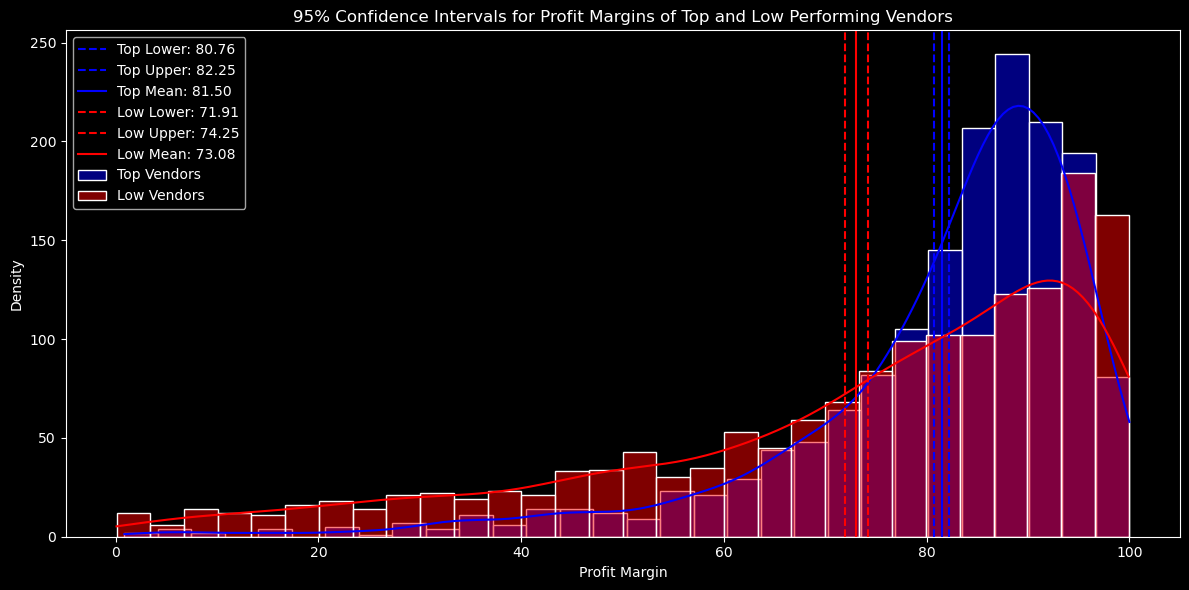

In [48]:
# Histogram for Top Vendor's plot and Low Vendor's plot

top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors 95% Confidence Interval: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% Confidence Interval: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

plt.figure(figsize=(12, 6))
plt.style.use('dark_background')

# Top Vendors Histogram
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean:.2f}")

# Low Vendors Histogram
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean: {low_mean:.2f}")

plt.title('95% Confidence Intervals for Profit Margins of Top and Low Performing Vendors')
plt.xlabel('Profit Margin')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

- The 95% confidence interval for low-performing vendors' profit margins is 71.91% to 74.25%, which is significantly lower than that of top-performing vendors, whose margins range from 80.76% to 82.25%.
- This indicates that top-performing vendors tend to maintain higher profit margins, possibly due to economies of scale, brand strength, or optimized operations.
- Low-performing vendors, despite potentially offering premium pricing or having lower operational costs, are not achieving high sales volume—suggesting a need to improve their market presence.
- Strategic Recommendations:
    - Top-Performing Vendors: Can focus on further enhancing profitability through cost optimization, selective price increases, or value-added bundling.
    - Low-Performing Vendors: May benefit from stronger marketing, competitive pricing strategies, and improved distribution channels to boost sales volume.



#### **9.** *Is there a significant difference in profit margins between top-performing and low-performing vendors?*
##### Hypothesis:
- **H₀(Null Hypothesis):** There is no significant difference between in the mean profit margins of top-performing and low-performing vendors.
- **H₁(Alternative Hypothesis):** There is a significant difference in the mean profit margins between top-performing and low-performing vendors.

In [49]:
top_threshold = Vendor_Summary['SalesDollars'].quantile(0.75)
low_threshold = Vendor_Summary['SalesDollars'].quantile(0.25)

top_vendors = Vendor_Summary[Vendor_Summary['SalesDollars']>= top_threshold]['ProfitMargin'].dropna().round(2)
low_vendors = Vendor_Summary[Vendor_Summary['SalesDollars']<= low_threshold]['ProfitMargin'].dropna().round(2)

# Perform Two-Sample T-Test
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

# Display the results
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject H₀: There is a significant difference in profit margins between top-performing and low-performing vendors.")
else:
    print("Fail to reject H₀: There is no significant difference in profit margins between top-performing and low-performing vendors.")

T-statistic: 11.9113, P-value: 0.0000
Reject H₀: There is a significant difference in profit margins between top-performing and low-performing vendors.
